In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import time
import matplotlib.pyplot as plt

Vamos a ver las primeras líneas de uno de los ficheros a ver qué campos tiene, que separadores utiliza, etc

In [4]:
!cat data/searches.csv| head -5 

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA
2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5cf2986e8e02^MD^ATH^MIL^0^1^ATH^MIL^2013-01-04^^^^^^^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^KIV
2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8ca55699ef3^US^ICT^SFO^1^2^ICT^SFO^2013-08-02^^^SFO^ICT^2013-08-09^^^^

# 1. Count the number of lines of each file

## Fichero searches.csv

## Línea de comandos de Linux

In [5]:
t0=time.time()
!cat data/searches.csv|wc -l
print('it has taken '+ str(round(time.time()-t0,2)) + ' seconds reading the whole file')

20390198
it has taken 1.13 seconds reading the whole file


### Utilizando pandas

In [6]:
t0=time.time()
lineas=0
for chunk in pd.read_csv('data/searches.csv',chunksize=10000,sep='^'):
    lineas+=len(chunk)
print('The file bookings.csv has ' + str(lineas) + ' lines')
print('it has taken '+ str(round(time.time()-t0,2)) + ' seconds reading the whole file')

The file bookings.csv has 20390198 lines
it has taken 86.62 seconds reading the whole file


## Fichero bookings.csv

### Línea de comandos

In [5]:
t0=time.time()
!cat data/bookings.csv|wc -l
print('it has taken '+ str(round(time.time()-t0,2)) + ' seconds reading the whole file')

10000011
it has taken 1.23 seconds reading the whole file


### Utilizando pandas

In [6]:
t0=time.time()
lineas=0
for chunk in pd.read_csv('data/bookings.csv',chunksize=10000,sep='^'):
    lineas+=len(chunk)
print('The file bookings.csv has ' + str(lineas) + ' lines')
print('it has taken '+ str(round(time.time()-t0,2)) + ' seconds reading the whole file')

The file bookings.csv has 10000010 lines
it has taken 57.67 seconds reading the whole file


# 2. Top 10 arrivals in the world in 2013 (using the bookings file)

- Arrival airport is the column arr_port. It is the IATA code for the airport
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.


In [8]:
df=pd.read_csv('data/bookings.csv',sep='^',nrows=1000)

In [9]:
df.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [19]:
df.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[['pax']]

,pax
arr_port,
DCA,50
JFK,14
FLL,13
PVG,13
CGK,12
...,...
GAU,-3
MLX,-3
CCJ,-3


In [28]:
n=10
top_10=pd.DataFrame()
for chunk in pd.read_csv('data/bookings.csv',sep='^',chunksize=10000):
    chunk=chunk[chunk['year']==2013][['arr_port','pax']]
    top_10=top_10.append(chunk.groupby('arr_port').sum()[['pax']])
    top_10=top_10.groupby('arr_port').sum()

top_10=top_10.groupby('arr_port').sum().sort_values(by='pax',ascending=False).head(n)
top_10

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


## - Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

## - Bonus point: Solve this problem using pandas (instead of any other approach)

# 3. Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona.

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

In [8]:
df=pd.DataFrame()
for chunk in pd.read_csv('data/searches.csv',sep='^',chunksize=10000):
    chunk=chunk[chunk['Destination'].isin(['AGP','BCN','MAD'])][['Date','Destination']]
    df=df.append(chunk)

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df.Date.apply(lambda x: x.month)
df=pd.DataFrame(df.groupby(['Destination','month']).size()).reset_index()

In [10]:
df=df.pivot_table(index='month',columns='Destination',values=0)

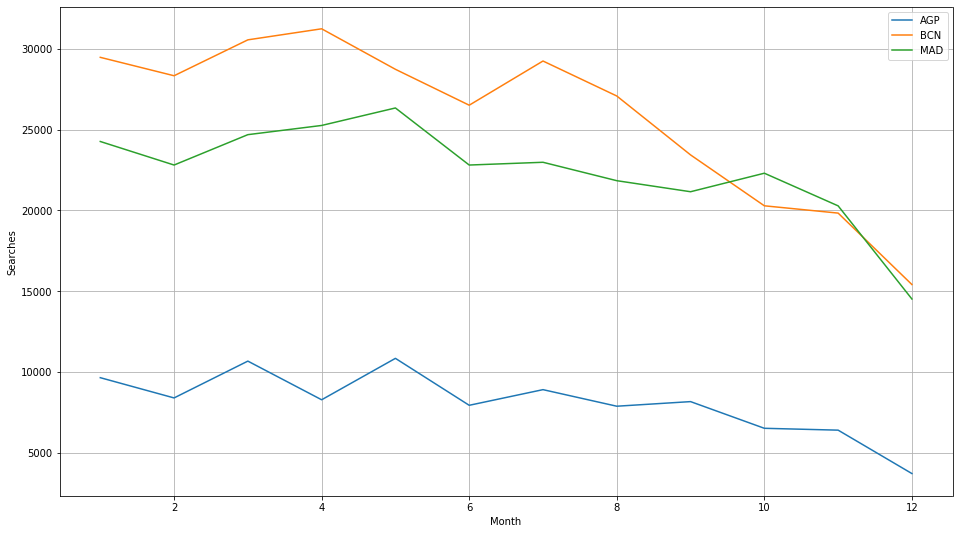

In [18]:
fig=plt.figure(figsize=(16,9))
plt.plot(df)
plt.legend(df.columns)
plt.grid(True)
plt.ylabel('Searches')
plt.xlabel('Month')
plt.show()

## Bonus Point: Solving this problem using Pandas instead of any other approach

# Bonus Exercise: Match searches with bookings

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

In [19]:
#bookings=pd.read_csv('data/bookings.csv',sep='^',usecols=['act_date','dep_port','arr_port'])
bookings_sample=pd.read_csv('data/bookings.csv',nrows=10000,sep='^')
searches_sample=pd.read_csv('data/searches.csv',nrows=10000,sep='^')

In [20]:
rename_cols={}
for col in bookings_sample.columns:
    rename_cols[col]=col.strip()

In [22]:
bookings_sample.rename(columns=rename_cols,inplace=True)

In [25]:
searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [27]:
type(searches_sample.loc[0,'Date'])

str

# Bonus Exercise: Write a web service

- Wrap the output of the second exercise in a web service that returns the data in JSON format. 
- The web should accept a parameter n>0. for the top 10, n is 10. For the X top airports, n is X